In [12]:
import pandas as pd
import numpy as np
from google.colab import drive

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton/data_exploration.csv")
df.head()

,Unnamed: 0,timestamp,indor1,indor2,indor3,external,flat,building,surface,stagione,ora
0,0,2001-02-20 00:00:00,21.75,21.37,21.33,NaN,0.09,0.67,417.0,1,0
1,1,2021-01-10 01:00:00,21.70,21.34,21.33,NaN,0.09,0.66,417.0,1,1
2,2,2021-01-10 02:00:00,21.69,21.33,21.28,NaN,0.09,0.65,417.0,1,2
3,3,2021-01-10 03:00:00,21.60,21.31,21.23,NaN,0.09,0.65,417.0,1,3
4,4,2021-01-10 04:00:00,21.57,21.22,21.22,NaN,0.09,0.65,417.0,1,4


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Remove irrelevant columns
df = df.drop(columns=['timestamp'])

# Handle missing values by filling with zeros
df = df.fillna(0)

# Split into features (X) and target (y)
X = df.drop(columns=['external']).values  # Input features
y = df[['external']].values  # Desired output

54/54 [==============================] - 2s 4ms/step
Epoch 1 - Output 1 - R2: -6.2687, MAE: 5.6762, MSE: 37.3497
Epoch 1 - Output 2 - R2: -2.1443, MAE: 4.4071, MSE: 28.4653
Epoch 1 - Output 3 - R2: -1.4573, MAE: 3.9890, MSE: 26.8109
54/54 [==============================] - 0s 4ms/step
Epoch 2 - Output 1 - R2: -0.2593, MAE: 2.1147, MSE: 6.4707
Epoch 2 - Output 2 - R2: -0.0406, MAE: 2.7670, MSE: 9.4204
Epoch 2 - Output 3 - R2: -0.0199, MAE: 2.9304, MSE: 11.1284
54/54 [==============================] - 0s 4ms/step
Epoch 3 - Output 1 - R2: 0.0005, MAE: 2.0037, MSE: 5.1358
Epoch 3 - Output 2 - R2: 0.0007, MAE: 2.7363, MSE: 9.0468
Epoch 3 - Output 3 - R2: 0.0008, MAE: 2.9731, MSE: 10.9026
54/54 [==============================] - 0s 5ms/step
Epoch 4 - Output 1 - R2: 0.0017, MAE: 1.9987, MSE: 5.1297
Epoch 4 - Output 2 - R2: -0.0002, MAE: 2.7363, MSE: 9.0548
Epoch 4 - Output 3 - R2: -0.0001, MAE: 2.9795, MSE: 10.9125
54/54 [==============================] - 0s 4ms/step
Epoch 5 - Output 1 - R2: 

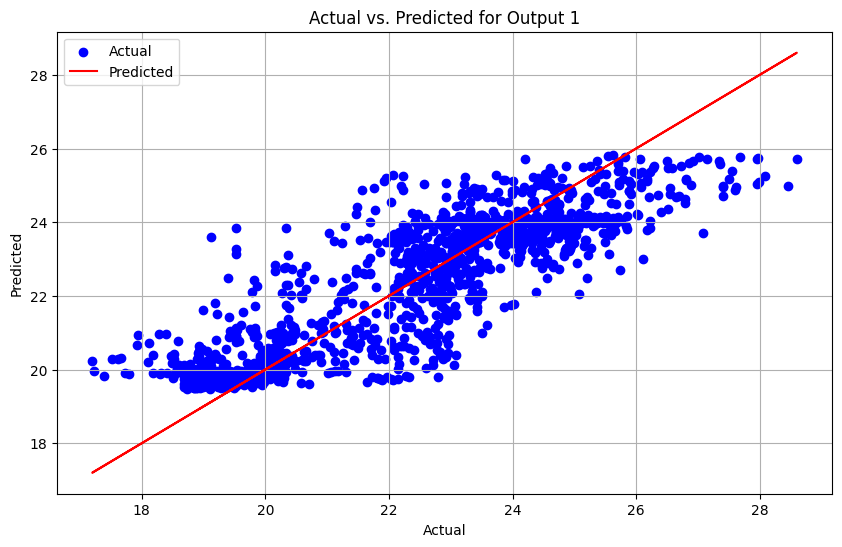

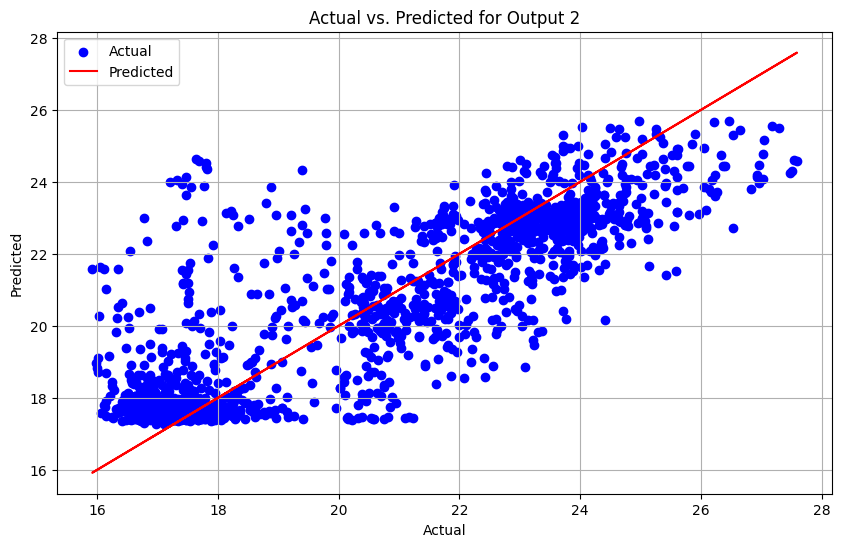

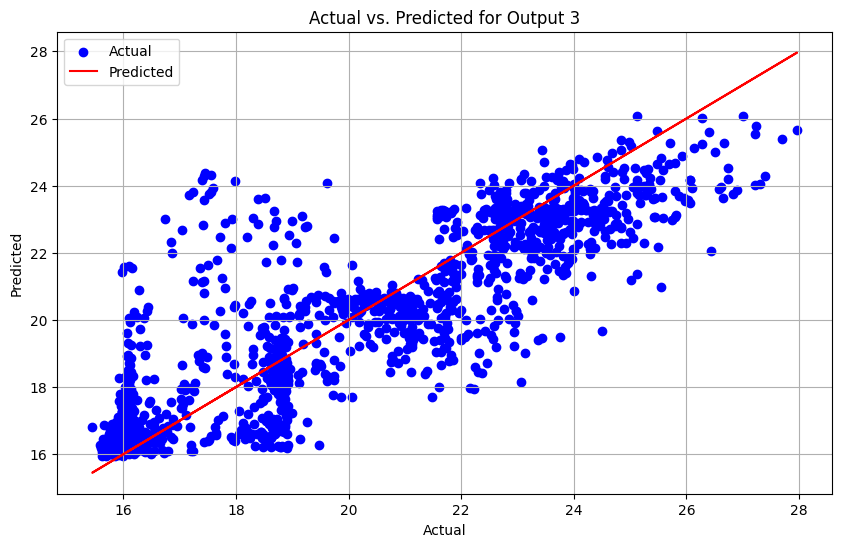

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the CSV data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton/data_exploration.csv")

# Remove irrelevant columns
df = df.drop(columns=['timestamp'])

# Handle missing values by filling with zeros
df = df.fillna(0)

# Split into features (X) and target (y)
X = df.drop(columns=['indor1', 'indor2', 'indor3']).values  # Input features
y = df[['indor1', 'indor2', 'indor3']].values  # Desired output

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define data dimensions
numero_di_istanti_temporali = X_train.shape[0]
numero_di_caratteristiche = X_train.shape[1]

# Reshape the input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Add a dimension
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(numero_di_caratteristiche, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3)  # Three output nodes for 'indor1', 'indor2', 'indor3'
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Create lists to store evaluation metrics for each output
r2_scores = []
mae_scores = []
mse_scores = []

# Training the model
for epoch in range(50):
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate on the test set
    y_pred = model.predict(X_test_reshaped)

    # Calculate evaluation metrics for each output
    for i in range(3):
        r2 = r2_score(y_test[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
        mse = mean_squared_error(y_test[:, i], y_pred[:, i])

        r2_scores.append(r2)
        mae_scores.append(mae)
        mse_scores.append(mse)

        print(f'Epoch {epoch + 1} - Output {i + 1} - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')

# Print the final evaluation metrics
final_loss = model.evaluate(X_test_reshaped, y_test)
print("Final Test loss:", final_loss)

# Print the mean of the evaluation metrics over all epochs
print("Mean R2:", np.mean(r2_scores))
print("Mean MAE:", np.mean(mae_scores))
print("Mean MSE:", np.mean(mse_scores))

import matplotlib.pyplot as plt
# Generate and display plots of actual vs. predicted outputs
for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[:, i], y_pred[:, i], color='blue', label='Actual')
    plt.plot(y_test[:, i], y_test[:, i], color='red', label='Predicted')
    plt.title(f'Actual vs. Predicted for Output {i + 1}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()


In [20]:
# Specify the directory for exporting the model to SavedModel format
export_dir = '/content/drive/MyDrive/Colab Notebooks/Hackaton/d2part3'

# Export the model to SavedModel format in the specified directory
tf.saved_model.save(model, export_dir)